In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Nomor 1:
1. Sentiment Analysis \
a. Buatlah sentiment analysis menggunakan dataset IMDB_Dataset (IMDB_Dataset.csv)berdasarkan nilai polaritas.\
i. Load dataset menggunakan read_csv, kemudian bentuk menjadi dataframe.\
ii. Buat sentiment analysis berdasarkan kolom review.\
iii. Perhatikan notebook pada resources modul 4 untuk cara mengerjakan.\
iv. Dari nilai polaritas tentukan apakah suatu review positive atau negative.\
b. Boleh menggunakan textblob maupun vader (salah satu saja).\
c. Bandingkanlah hasil sentiment analysis dengan ground truth (kolom sentiment). \
Cukup
lakukan secara manual seperti tulis kesimpulan dalam markdown/comment, atau dapat
tambahkan kolom dalam dataframe yang berisi true/false.


In [5]:
import pandas as pd
from textblob import TextBlob

In [6]:
file_path = '/content/drive/MyDrive/Kuliah/AICI/IMDB_Dataset.csv'

In [7]:
def get_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

In [8]:
df['polaritas'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['predicted_sentiment'] = df['polaritas'].apply(get_sentiment)

In [9]:
print(df.head())

                                              review sentiment  polaritas  \
0  One of the other reviewers has mentioned that ...  positive   0.023433   
1  A wonderful little production. <br /><br />The...  positive   0.109722   
2  I thought this was a wonderful way to spend ti...  positive   0.354008   
3  Basically there's a family where a little boy ...  negative  -0.057813   
4  Petter Mattei's "Love in the Time of Money" is...  positive   0.217952   

  predicted_sentiment  match  
0            positive   True  
1            positive   True  
2            positive   True  
3            negative   True  
4            positive   True  


In [10]:
df['match'] = df['sentiment'] == df['predicted_sentiment']

In [11]:
print(df[['review', 'sentiment', 'predicted_sentiment', 'match']].head(10))

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   
5  Probably my all-time favorite movie, a story o...  positive   
6  I sure would like to see a resurrection of a u...  positive   
7  This show was an amazing, fresh & innovative i...  negative   
8  Encouraged by the positive comments about this...  negative   
9  If you like original gut wrenching laughter yo...  positive   

  predicted_sentiment  match  
0            positive   True  
1            positive   True  
2            positive   True  
3            negative   True  
4            positive   True  
5            positive   True  
6            positive   True  
7            positive  Fa

2. Topic Modelling\
a. Lakukanlah topic modelling terhadap dataset topicmodelling.csv\
i. Load dataset menggunakan read_csv, kemudian bentuk menjadi dataframe.\
ii. Lakukan topic modelling berdasarkan kolom abstract.\
iii. Perhatikan notebook pada resources modul 5 untuk cara mengerjakan.\
iv. Cobalah beberapa num_topics, kemudian coba menggunakan 5 num_topics\
v. Bandingkan dengan table dataset awal apakah pengelompokan topik yang\
didapat sama dengan pada dataset (mis. Paper a,b, e masuk ke topik 1, dll).
Topik pada table bisa dilihat pada kolom Computer Science, Physics,
Mathematics, Statistics, Quantitative Biology, dimana angka 1 menandakan
suatu paper masuk ke topik kolom tersebut.\
vi. Perhatikan juga apakah top words yang dihasilkan sesuai dengan topik-topik
yang ada (Urutan topik bisa berbeda, Computer Science belum tentu menjadi
topik pertama, dst.).


In [13]:
file_path = '/content/drive/MyDrive/Kuliah/AICI/topicmodelling.csv'
df = pd.read_csv(file_path)

df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0


In [15]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

df['processed_abstract'] = df['ABSTRACT'].apply(preprocess)

df[['ABSTRACT', 'processed_abstract']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ABSTRACT,processed_abstract
0,Predictive models allow subject-specific inf...,"[predictive, models, allow, subject-specific, ..."
1,Rotation invariance and translation invarian...,"[rotation, invariance, translation, invariance..."
2,We introduce and develop the notion of spher...,"[introduce, develop, notion, spherical, polyha..."
3,The stochastic Landau--Lifshitz--Gilbert (LL...,"[stochastic, landau, --, lifshitz, --, gilbert..."
4,Fourier-transform infra-red (FTIR) spectra o...,"[fourier-transform, infra-red, ftir, spectra, ..."


In [16]:
from gensim import corpora

dictionary = corpora.Dictionary(df['processed_abstract'])

corpus = [dictionary.doc2bow(text) for text in df['processed_abstract']]

print(corpus[:2])


[[(0, 4), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 8), (29, 1), (30, 2), (31, 1), (32, 1), (33, 2), (34, 3), (35, 1), (36, 1), (37, 1), (38, 3), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 3), (59, 1), (60, 2), (61, 1), (62, 1), (63, 4), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 3), (83, 1), (84, 2), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 2), (101, 1), (102, 1), (103, 2), (104, 1), (105, 5), (106, 1), (107, 1), (108, 1), (109, 2), (110, 1)

In [17]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.019*"data" + 0.012*"using" + 0.012*"material" + 0.012*"rsm" + 0.012*"\'s"')
(1, '0.016*"processing" + 0.016*"wtt" + 0.016*"dwt" + 0.011*"data" + 0.011*"spectra"')
(2, '0.017*"solutions" + 0.017*"stochastic" + 0.017*"poisson" + 0.017*"functions" + 0.013*"equation"')
(3, '0.037*"\\omega" + 0.033*"\\lambda_1" + 0.022*"x+d" + 0.015*"invariance" + 0.015*"\\phi_"')
(4, '0.022*"epidemic" + 0.011*"model" + 0.011*"behavior" + 0.011*"liquid" + 0.011*"polymer"')


In [19]:
def get_dominant_topic(doc):
    topic_probs = lda_model[doc]
    dominant_topic = sorted(topic_probs, key=lambda x: -x[1])[0][0]
    return dominant_topic

df['predicted_topic'] = [get_dominant_topic(doc) for doc in corpus]

df[['ABSTRACT', 'predicted_topic']].head()


,ABSTRACT,predicted_topic
0,Predictive models allow subject-specific inf...,0
1,Rotation invariance and translation invarian...,3
2,We introduce and develop the notion of spher...,2
3,The stochastic Landau--Lifshitz--Gilbert (LL...,2
4,Fourier-transform infra-red (FTIR) spectra o...,1


In [28]:
def get_matching_topic(row):
    predicted_topic = row['predicted_topic']

    topics_columns = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology']

    if row[topics_columns[predicted_topic]] == 1:
        return True
    else:
        return False

df['match'] = df.apply(get_matching_topic, axis=1)

df[['ABSTRACT', 'predicted_topic', 'Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'match']].head(10)


,ABSTRACT,predicted_topic,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,match
0,Predictive models allow subject-specific inf...,0,1,0,0,0,0,True
1,Rotation invariance and translation invarian...,3,1,0,0,0,0,False
2,We introduce and develop the notion of spher...,2,0,0,1,0,0,True
3,The stochastic Landau--Lifshitz--Gilbert (LL...,2,0,0,1,0,0,True
4,Fourier-transform infra-red (FTIR) spectra o...,1,1,0,0,1,0,False
5,Let $\Omega \subset \mathbb{R}^n$ be a bound...,3,0,0,1,0,0,False
6,We observed the newly discovered hyperbolic ...,0,0,1,0,0,0,False
7,The ability of metallic nanoparticles to sup...,4,0,1,0,0,0,False
8,We model large-scale ($\approx$2000km) impac...,0,0,1,0,0,0,False
9,Time varying susceptibility of host at indiv...,4,0,0,0,0,1,True


3. Text Generation\
a. Buatlah sebuah paragraph baru dengan mengenerate text berdasarkan dataset
game_of_thrones.txt\
i. Load dataset dengan:\
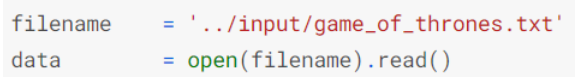\
(Ingat: input text generation cukup dalam bentuk string)\
ii. Perhatikan notebook pada resources modul 6 untuk cara mengerjakan.\
iii. Buatlah sebuah paragraph baru dengan 10 kalimat (lakukan 10 kali looping saat
mengenerate sentence) dengan tiap kalimat terdiri dari 15 kata.\
iv. Bacalah hasil text yang dihasilkan.

In [29]:
file_path = '/content/drive/MyDrive/Kuliah/AICI/topicmodelling.csv'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

print(text[:1000])


ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology
1,Reconstructing Subject-Specific Effect Maps,"  Predictive models allow subject-specific inference when analyzing disease
related alterations in neuroimaging data. Given a subject's data, inference can
be made at two levels: global, i.e. identifiying condition presence for the
subject, and local, i.e. detecting condition effect on each individual
measurement extracted from the subject's data. While global inference is widely
used, local inference, which can be used to form subject-specific effect maps,
is rarely used because existing models often yield noisy detections composed of
dispersed isolated islands. In this article, we propose a reconstruction
method, named RSM, to improve subject-specific detections of predictive
modeling approaches and in particular, binary classifiers. RSM specifically
aims to reduce noise due to sampling error associated with using a finite
sample of examples to train c

In [30]:
import string

def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    words = text.split()
    return words

words = preprocess_text(text)

print(words[:20])


['idtitleabstractcomputer', 'sciencephysicsmathematicsstatisticsquantitative', 'biology', '1reconstructing', 'subjectspecific', 'effect', 'maps', 'predictive', 'models', 'allow', 'subjectspecific', 'inference', 'when', 'analyzing', 'disease', 'related', 'alterations', 'in', 'neuroimaging', 'data']


In [31]:
import random

def generate_bigram_model(words):
    bigram_model = {}

    for i in range(len(words) - 1):
        if words[i] not in bigram_model:
            bigram_model[words[i]] = []
        bigram_model[words[i]].append(words[i + 1])

    return bigram_model

bigram_model = generate_bigram_model(words)

for word in list(bigram_model.keys())[:5]:
    print(word, bigram_model[word][:5])


idtitleabstractcomputer ['sciencephysicsmathematicsstatisticsquantitative']
sciencephysicsmathematicsstatisticsquantitative ['biology']
biology ['1reconstructing']
1reconstructing ['subjectspecific']
subjectspecific ['effect', 'inference', 'effect', 'detections', 'detections']


In [32]:
def generate_sentence(bigram_model, length=15):
    current_word = random.choice(list(bigram_model.keys()))
    sentence = [current_word]

    for _ in range(length - 1):
        next_word = random.choice(bigram_model.get(current_word, [current_word]))
        sentence.append(next_word)
        current_word = next_word

    return ' '.join(sentence).capitalize() + '.'

sentences = [generate_sentence(bigram_model, length=15) for _ in range(10)]

paragraph = ' '.join(sentences)

print(paragraph)


Maxwell equations the novel nanostructured magnetic memories we propose a classifierspecific fashion experimental evaluation is. Analyses on 2017 u1 on the influence of ftir data demonstrate that using molecular dynamics. Kernel for the first dirichlet eigenvalue lambda1omega then all maximizers xd first reformulate the equation. But initiates a coma or normal epidemic in a new architecture in image having an. Ratio is sufficiently large enough in terms of the shortterm transmission dynamics meanwhile the stochastic. 2rotation invariance 10000 2rotation invariance 10000 3spherical polyharmonics which are interested in the large with. Heat flow while the thermal transport at a direct corollary is large enough in a. Nonoverlap target last but not wellstudied even though the classical poisson kernels for biomedical applications. Different binary classifiers in the existence of domain referred to approximate the final amount of. Ball 00100 7on the solutions we found through grid search wer